In [1]:
import pygimli as pg
from pygimli.physics import ert

Data: Sensors: 42 data: 527, nonzero entries: ['a', 'b', 'err', 'k', 'm', 'n', 'rhoa', 'valid']


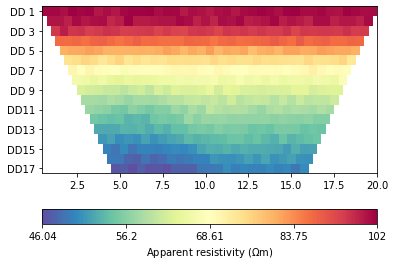

In [2]:
DATA = [ert.load('data{:d}.dat'.format(i)) for i in range(4)]
print(DATA[0])
ax, _ = ert.show(DATA[1])

In [3]:
# Define some options for plotting
cDict = dict(colorBar=True, cMin=10, cMax=100, logScale=1, cMap='Spectral_r')

In [4]:
mgr = ert.Manager(DATA[0])
mgr.invert(zWeight=0.2, verbose=True, quality=34.6, paraDX=0.25)
baseline = mgr.model.copy()

01/12/22 - 23:13:57 - pyGIMLi - INFO - Found 2 regions.
01/12/22 - 23:13:57 - pyGIMLi - INFO - Region with smallest marker (1) set to background
01/12/22 - 23:13:57 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/12/22 - 23:13:57 - pyGIMLi - INFO - Creating refined mesh (P2) to solve forward task.
01/12/22 - 23:13:57 - pyGIMLi - INFO - Use median(data values)=66.0953836987312
01/12/22 - 23:13:57 - pyGIMLi - INFO - Created startmodel from forward operator: 1300 [66.0953836987312,...,66.0953836987312]
01/12/22 - 23:13:57 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002123BCA7C20>
Data transformation: <pygimli.core._pygimli_.RTransLogLU object at 0x000002123BCA75E0>
Model transformation (cumulative):
	 0 <pygimli.core._pygimli_.RTransLogLU object at 0x000002123BD00A60>
min/max (data): 48.64/103
min/max (error): 1%/1%
min/max (start model): 66.1/66.1
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 0.83 (dPhi = 89.73%) lam: 20


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.83)                   #
################################################################################


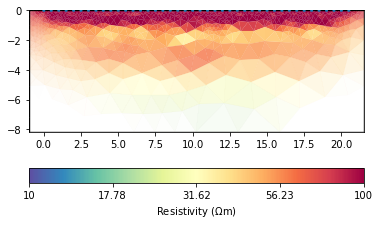

In [5]:
mgr.showResult(**cDict);

In [6]:
timesteps = []
for data in DATA[1:]:
    mgr.invert(data, zWeight=0.2, verbose=True, startModel=baseline, isReference=True)
    timesteps.append(mgr.model)
    # mgr.showResult(**cDict);

01/12/22 - 23:14:10 - pyGIMLi - INFO - Starting inversion.
01/12/22 - 23:14:10 - pyGIMLi - INFO - Setting starting model as reference!


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002123BCA7C20>
Data transformation: <pygimli.core._pygimli_.RTransLogLU object at 0x000002123BCA75E0>
Model transformation (cumulative):
	 0 <pygimli.core._pygimli_.RTransLogLU object at 0x00000212528D7E20>
min/max (data): 46.04/102
min/max (error): 1%/1%
min/max (start model): 21.05/124
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... 

01/12/22 - 23:14:20 - pyGIMLi - INFO - Starting inversion.
01/12/22 - 23:14:20 - pyGIMLi - INFO - Setting starting model as reference!


chi² = 0.73 (dPhi = 8.17%) lam: 20


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.73)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002123BCA7C20>
Data transformation: <pygimli.core._pygimli_.RTransLogLU object at 0x000002123BCA75E0>
Model transformation (cumulative):
	 0 <pygimli.core._pygimli_.RTransLogLU object at 0x00000212528D7B80>
min/max (data): 41.59/103
min/max (error): 1%/1%
min/max (start model): 21.05/124
--------------------------------------------------------------------------------


01/12/22 - 23:14:29 - pyGIMLi - INFO - Starting inversion.
01/12/22 - 23:14:29 - pyGIMLi - INFO - Setting starting model as reference!


--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 0.62 (dPhi = 36.49%) lam: 20


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.62)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002123BCA7C20>
Data transformation: <pygimli.core._pygimli_.RTransLogLU object at 0x000002123BCA75E0>
Model transformation (cumulative):
	 0 <pygimli.core._pygimli_.RTransLogLU object at 0x00000212528D7B80>
min/max (data): 34.32/102
min/max (error): 1%/1%
min/max (start model): 21.05/124
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 0.65 (dPhi = 18.32%) lam: 20


####################################################

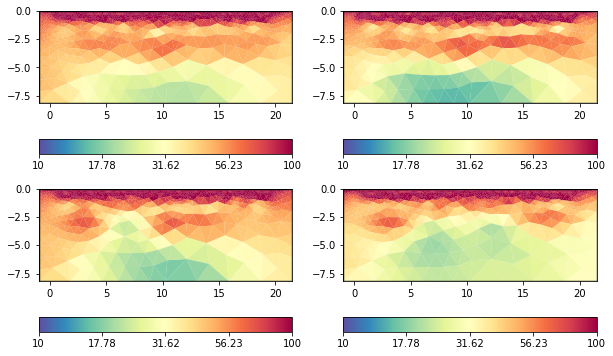

In [7]:
fig, ax = pg.plt.subplots(nrows=len(DATA)//2, ncols=2, figsize=(10, 6))
pg.show(mgr.paraDomain, baseline, ax=ax.flat[0], **cDict)
for i, res in enumerate(timesteps):
    pg.show(mgr.paraDomain, res, ax=ax.flat[i+1], **cDict)

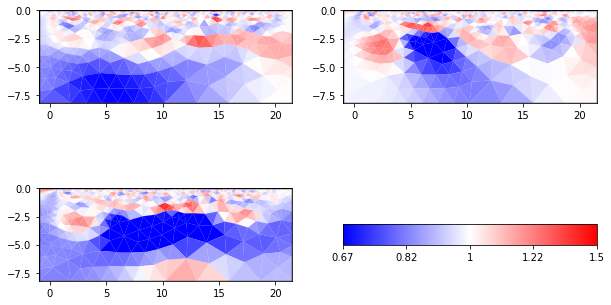

In [8]:
fig, ax = pg.plt.subplots(nrows=len(DATA)//2, ncols=2, figsize=(10, 6))
rDict = dict(cMap='bwr', cMin=1/1.5, cMax=1.5, logScale=True)
for i, res in enumerate(timesteps):
    ratio = res / baseline
    pg.show(mgr.paraDomain, ratio, ax=ax.flat[i], **rDict, colorBar=False)

cDict['label'] = r'ratio'
pg.viewer.mpl.colorbar.createColorBarOnly(ax=ax.flat[-1], **rDict)
ax.flat[-1].set_aspect(0.03)